# FeeBee

This colab is used to compare BER estimator on real world data. The csv files imported were generated using the FeeBee framework (https://github.com/DS3Lab/feebee). This colab merely uses the csv files generated by the framework and stored in GDrive to visualize the results in plots and tables.

In [13]:
methods_to_evaluate = ['kde_knn_loo', 'ghp', 'kde', 'knn', '1nn', 'knn_extrapolate', 'knn_loo', 'onenn']

download_pre_computed_files = True

## Initialisation

### Imports

In [14]:
import seaborn as sns
import ast
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import math
import json
import numpy as np
import os
import os.path as path

sns.set(font="DejaVu Sans", context="paper", style="whitegrid", font_scale=2)

### Load config for datasets

In [15]:
with open('config.json') as json_file:
    config = json.load(json_file)

### Download csv files

In [16]:
if download_pre_computed_files:
    !wget -q --show-progress --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zAQEWV8lMmtgL6gyTwYV2iAPDajRDiFd' -O analysis.csv
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yL86br4WclgZ9KiL1LzEKx1QVWgVHId1' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yL86br4WclgZ9KiL1LzEKx1QVWgVHId1" -O results.csv && rm -rf /tmp/cookies.txt
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11p1XBJLdyA_UUp4XUI9LKnxw3e-UZ-ro' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11p1XBJLdyA_UUp4XUI9LKnxw3e-UZ-ro" -O areas.csv && rm -rf /tmp/cookies.txt
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11p1XBJLdyA_UUp4XUI9LKnxw3e-UZ-ro' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11p1XBJLdyA_UUp4XUI9LKnxw3e-UZ-ro" -O areas.csv && rm -rf /tmp/cookies.txt

analysis.csv        100%[===================>] 123,57K  --.-KB/s    in 0,03s   
results.csv         100%[===================>] 466,11M  8,11MB/s    in 54s     
areas.csv           100%[===================>]   7,35M  8,79MB/s    in 0,8s    
areas.csv           100%[===================>]   7,35M  9,43MB/s    in 0,8s    


In [17]:
if download_pre_computed_files:
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=105gImOyuy0W0DYDUp4SOZ5vtg0JM9m7P' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=105gImOyuy0W0DYDUp4SOZ5vtg0JM9m7P" -O areas_0.75.csv && rm -rf /tmp/cookies.txt
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=12lBAnBUewBCTjKIYPQgM0A95PtlAtYAR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=12lBAnBUewBCTjKIYPQgM0A95PtlAtYAR" -O areas_0.90.csv && rm -rf /tmp/cookies.txt
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1PmO-gYAVqpOfjo3vDPCg31cD2dCg45rM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1PmO-gYAVqpOfjo3vDPCg31cD2dCg45rM" -O areas_0.95.csv && rm -rf /tmp/cookies.txt
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nzDDyhA4YD5rURubryMxs7wbmPPzo7uS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nzDDyhA4YD5rURubryMxs7wbmPPzo7uS" -O areas_1.05.csv && rm -rf /tmp/cookies.txt
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1W-ZXEV-3ekYuP4HAlVtQOK0_tOV8NYQE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1W-ZXEV-3ekYuP4HAlVtQOK0_tOV8NYQE" -O areas_1.10.csv && rm -rf /tmp/cookies.txt
    !wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uXmzvqZ2q73tlbhJBoVL77CryLlg1hUK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1uXmzvqZ2q73tlbhJBoVL77CryLlg1hUK" -O areas_1.25.csv && rm -rf /tmp/cookies.txt

areas_0.75.csv      100%[===================>]   7,35M  8,99MB/s    in 0,8s    
areas_0.90.csv      100%[===================>]   7,35M  9,08MB/s    in 0,8s    
areas_0.95.csv      100%[===================>]   7,35M  9,02MB/s    in 0,8s    
areas_1.05.csv      100%[===================>]   7,36M  9,00MB/s    in 0,8s    
areas_1.10.csv      100%[===================>]   7,35M  9,41MB/s    in 0,8s    
areas_1.25.csv      100%[===================>]   7,35M  8,77MB/s    in 0,8s    


### Read data to dataframes

In [18]:
df_analysis = pd.read_csv("analysis.csv")
df_analysis = df_analysis[df_analysis.dataset.isin(config.keys())]
df_analysis.drop(columns=df_analysis.columns[0], 
                 axis=1,
                 inplace=True)

In [19]:
df_results = pd.read_csv("results.csv")
df_results = df_results[df_results.dataset.isin(config.keys())]
df_results.drop(columns=df_results.columns[0],
                axis=1,
                inplace=True)
df_results["results"] = df_results.results.apply(lambda x: [float(z) for z in x[1:-1].split(', ')] if x.startswith('[') else [float(x)])

# Get transformation from identifier
def split_identifiers(x):
  for v in ["_l2_", "_beta_", "_measure_"]:
    if v in x:
      x = x.split(v)[0]
  return x

df_results["transformation"] = df_results.identifier.apply(split_identifiers)

# Split into upper and lower
df_results["value"] = df_results.results.apply(lambda x: x[0])
df_results["value_type"] = "upperbound"

scaling_constant = 0.95
cp_df = df_results.copy()
cp_df["value"] = cp_df.results.apply(lambda x: x[1] if len(x) > 1 else x[0]*scaling_constant)
cp_df["value_type"] = "lowerbound"

df_results = pd.concat([df_results, cp_df], ignore_index=True)

# Add 1NN
cp_df = df_results[(df_results.method == 'knn') &
                   (df_results.variant.str.endswith(', k=1'))].copy()
 
cp_df["method"] = '1nn'
cp_df["variant"] = cp_df.variant.apply(lambda x: x[:-len(", k=1")])

df_results = pd.concat([df_results, cp_df], ignore_index=True)

# Change LR and add other constant
df_results["method"] = df_results.method.apply(lambda x: x if x != 'lr_model' else f'lr_model_{scaling_constant}')

scaling_constant = 0.8
cp_df = df_results[(df_results.method.str.startswith('lr_model')) & 
                   (df_results.value_type == 'upperbound')].copy()
cp_df["method"] = f'lr_model_{scaling_constant}'

cp_df2 = cp_df.copy()
cp_df2["value"] = cp_df2.results.apply(lambda x: x[1] if len(x) > 1 else x[0]*scaling_constant)
cp_df2["value_type"] = "lowerbound"
df_results = pd.concat([df_results, cp_df, cp_df2], ignore_index=True)

# Set label
df_results["label"] = df_results.method + '/' + df_results.variant + '/' + df_results.transformation

# DROP NaNs
df_results.dropna(subset = ["value"], inplace=True)

In [20]:
df_areas = pd.read_csv("areas.csv")
df_areas = df_areas[df_areas.dataset.isin(config.keys())]
df_areas.drop(columns=df_areas.columns[0], 
              axis=1, 
              inplace=True)

# Rescale areas to lies between 0 and 1
def update_area(row, column):
  classes = config[row["dataset"]]['classes']
  return row[column] * ((2*classes)/(classes -1))

for column in ["eu_top", "eu_bottom", "eu_sum", "el_top", "el_bottom", "el_sum"]:
  df_areas[column] = df_areas.apply(lambda row: update_area(row, column), axis=1)

In [21]:
df_areas_factors = {}

for factor in ['0.75', '0.90', '0.95', '1.05', '1.10', '1.25']:
  df_current = pd.read_csv(f"areas_{factor}.csv")
  df_current = df_current[df_current.dataset.isin(config.keys())]
  df_current.drop(columns=df_current.columns[0], 
                axis=1, 
                inplace=True)

  # Rescale areas to lies between 0 and 1
  def update_area(row, column):
    classes = config[row["dataset"]]['classes']
    return row[column] * ((2*classes)/(classes -1))

  for column in ["eu_top", "eu_bottom", "eu_sum", "el_top", "el_bottom", "el_sum"]:
    df_current[column] = df_current.apply(lambda row: update_area(row, column), axis=1)
  
  df_areas_factors[factor] = df_current

## Common functions

In [22]:
def shorten_variant(variant):
  variant = variant.replace('kernel=gaussian, ', '')
  variant = variant.replace('bandwidth=', 'B=')
  variant = variant.replace('measure=', 'dist=')
  return variant

def readble_method(method):
  if method.startswith('lr_model'):
    val = float(method.split('_')[-1])
    return f"LR ({val})"
  mapping = {
      'kde_knn_loo': 'DE-kNN',
      'ghp': 'GHP',
      'kde': 'Gaussian KDE',
      'knn': 'kNN',
      '1nn': '1NN',
      'knn_extrapolate': 'kNN_Extrapolate',
      'knn_loo': 'kNN-LOO',
      'onenn': '1NN-kNN'
  }
  return mapping[method]

def readble_transformation(transformation):
  for remove in ["_pt", "_tf"]:
    transformation = transformation.replace(remove, '')

  mapping = {
      # VISION
      'alexnet': "AlexNet",
      'googlenet': "GoogleNet",
      'inception_v3': 'InceptionV3',
      'raw': "Raw",
      # NLP
      'bert': 'BERT', 
      'bow': 'BOW', 
      'bowidf': 'BOW-TFIDF', 
      'elmo': 'ELMO', 
      'use': 'USE'
  }

  if transformation in mapping.keys():
    return mapping[transformation]

  if "pca_" in transformation:
    l = len("pca_")
    return f"PCA (d={transformation[l:]})"

  # VISION
  if "efficientnet" in transformation:
    return f"EfficientNet-B{transformation[-1]}"
  if "nca" in transformation:
    return f"NCA (d={transformation[-2:]})"
  if "resetnet_v2_" in transformation:
    l = len("resetnet_v2_")
    return f"ResNet{transformation[l:]}-V2"
  if "vgg" in transformation:
    return f"VGG{transformation[-2:]}"

  # NLP
  if 'nnlm' in transformation and '_norm' in transformation:
    val = transformation[:-len('_norm')][len('nnlm'):]
    return f"NNLM-EN-NORM (d={val})"
  if 'nnlm' in transformation:
    val = transformation[len('nnlm'):]
    return f"NNLM-EN (d={val})"

  return transformation

## Number of runs (success / failed / timed out)

In [23]:
print("Total number of runs: {}".format(df_analysis.count()[0]))
print("Out of memory: {}".format(df_analysis[df_analysis.status == "ERROR"].count()[0]))
print("Timed out: {}".format(df_analysis[df_analysis.status == "TIMEOUT"].count()[0]))

Total number of runs: 2352
Out of memory: 103
Timed out: 60


## Plots

In [24]:
fig_folder = "figures"
if not path.exists(fig_folder):
  os.mkdir(fig_folder)

### Style and common functions

In [25]:
dash_list = sns._core.unique_dashes(2)
dashes = {
    "upperbound": dash_list[0],
    "lowerbound": dash_list[1],
}

palette ={}
for i, m in enumerate(methods_to_evaluate):
  palette[readble_method(m)] = f'C{i}'

In [26]:
def plot_single_axis(ax, dataset, methods, variants, transformations, ci=None,
                     labels_src='method', label_fn=readble_method, 
                     value_type=None, use_palet=None):

  classes = config[dataset]['classes']
  sota = config[dataset]['sota']

  def filter_fn(row):
    for i, m in enumerate(methods):
      if ((row.method == m) and
          (row.transformation == transformations[i]) and 
          (row.variant == variants[i])):
          return True
    return False

  filtered_df = df_results[(df_results.dataset == dataset) & 
                          (df_results.method.isin(methods)) & 
                          (df_results.transformation.isin(transformations)) & 
                          (df_results.variant.isin(variants))]
  
  if value_type:
    filtered_df = filtered_df[filtered_df.value_type == value_type]

  filtered_df = filtered_df[filtered_df.apply(filter_fn, axis=1)].copy()

  filtered_df.label = filtered_df[labels_src].map(label_fn)

  x = [x/float(10) for x in range(11)]
  y_true_upper = [sota + val*((classes - 1.0) / classes - sota) for val in x]
  trivial_lower = 0.0
  y_true_lower = [trivial_lower + val * ((classes - 1.0) / classes - trivial_lower) for val in x]
  
  if (use_palet is None and labels_src == 'method') or use_palet:
    sns.lineplot(ax=ax, data=filtered_df, x='noise', y='value', 
                 hue='label', style='value_type', dashes=dashes,
                 ci=ci, linewidth = 3, alpha=0.7, palette=palette)
  else:
    sns.lineplot(ax=ax, data=filtered_df, x='noise', y='value', 
                 hue='label', style='value_type', dashes=dashes,
                 ci=ci, linewidth = 3, alpha=0.7)

  sns.lineplot(ax=ax, x=x, y=y_true_upper)
  sns.lineplot(ax=ax, x=x, y=y_true_lower)
  ax.lines[-2].set_color("Gray")
  ax.lines[-1].set_color("Gray")
  ax.lines[-1].set_linestyle("--")
  ax.set_xlabel(r"Label noise $\rho$")
  ax.set_ylabel("Estimate")

### Custom examples of comparisons

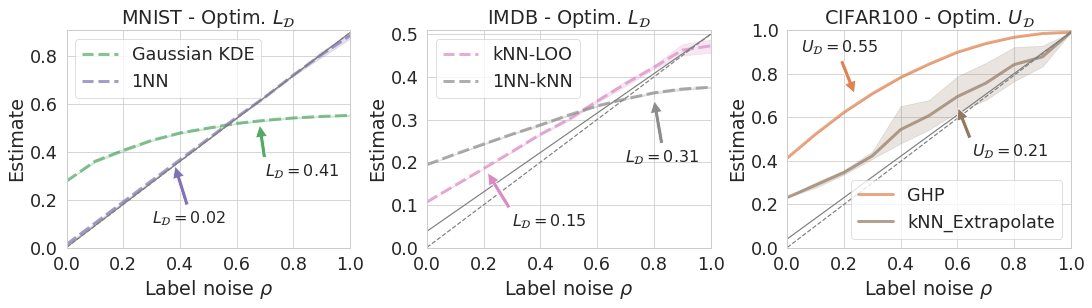

In [27]:
f, axes = plt.subplots(1, 3, figsize=(18, 4))

# CONFIG 1
dataset = 'mnist'
methods = ['1nn', 'kde']
variants = ['measure=cosine', 'kernel=gaussian, bandwidth=0.05']
transformations = ['nca_64', 'vgg16_pt']

ax = axes[0]
ax.set_title("MNIST - Optim. $L_\mathcal{D}$")
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 0.91)

plot_single_axis(ax, dataset, methods, variants, transformations, ci=95,
                 value_type='lowerbound')

# Get values for L_D method 1
val = df_areas[(df_areas.dataset == dataset) & 
               (df_areas.method == methods[0]) & 
               (df_areas.variant == variants[0]) &
               (df_areas.transformation == transformations[0])].iloc[0].el_sum
ax.annotate('$L_\mathcal{{D}}={0:.2f}$'.format(val), xy = (0.38, 0.35), xytext = (0.3, 0.1),
            arrowprops=dict(facecolor = palette[readble_method(methods[0])], 
                            alpha=1.0, shrink = 0.05), fontsize = 16)

# Get values for L_D method 2
val = df_areas[(df_areas.dataset == dataset) & 
               (df_areas.method == methods[1]) & 
               (df_areas.variant == variants[1]) &
               (df_areas.transformation == transformations[1])].iloc[0].el_sum
ax.annotate('$L_\mathcal{{D}}={0:.2f}$'.format(val), xy = (0.68, 0.52), xytext = (0.7, 0.3),
            arrowprops=dict(facecolor = palette[readble_method(methods[1])], 
                            alpha=1.0, shrink = 0.05), fontsize = 16)

handles, lables = ax.get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
  h.set_linestyle('dashed')
ax.legend(handles[1:1+len(methods)], lables[1:1+len(methods)])

# CONFIG 2
dataset = 'imdb'
methods = ['knn_loo', 'onenn']
variants = ['measure=squared_l2, k=1', 'measure=cosine, k=4']
transformations = ['use', 'pca_32']

ax = axes[1]
ax.set_title("IMDB - Optim. $L_\mathcal{D}$")
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 0.51)

plot_single_axis(ax, dataset, methods, variants, transformations, ci=95,
                 value_type='lowerbound')

# Get values for L_D method 1
val = df_areas[(df_areas.dataset == dataset) & 
               (df_areas.method == methods[0]) & 
               (df_areas.variant == variants[0]) &
               (df_areas.transformation == transformations[0])].iloc[0].el_sum
ax.annotate('$L_\mathcal{{D}}={0:.2f}$'.format(val), xy = (0.21, 0.18), xytext = (0.3, 0.05),
            arrowprops=dict(facecolor = palette[readble_method(methods[0])], 
                            alpha=1.0, shrink = 0.05), fontsize = 16)

# Get values for L_D method 2
val = df_areas[(df_areas.dataset == dataset) & 
               (df_areas.method == methods[1]) & 
               (df_areas.variant == variants[1]) &
               (df_areas.transformation == transformations[1])].iloc[0].el_sum
ax.annotate('$L_\mathcal{{D}}={0:.2f}$'.format(val), xy = (0.8, 0.35), xytext = (0.7, 0.2),
            arrowprops=dict(facecolor = palette[readble_method(methods[1])], 
                            alpha=1.0, shrink = 0.05), fontsize = 16)

handles, lables = ax.get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
  h.set_linestyle('dashed')
ax.legend(handles[1:1+len(methods)], lables[1:1+len(methods)])

# CONFIG 3
dataset = 'cifar100'
methods = ['ghp', 'knn_extrapolate']
variants = ['default', 'measure=cosine, k=7']
transformations = ['efficientnet_b7_tf', 'pca_32']

ax = axes[2]
ax.set_title("CIFAR100 - Optim. $U_\mathcal{D}$")
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)

plot_single_axis(ax, dataset, methods, variants, transformations, ci=95,
                 value_type='upperbound')

# Get values for L_D method 1
val = df_areas[(df_areas.dataset == dataset) & 
               (df_areas.method == methods[0]) & 
               (df_areas.variant == variants[0]) &
               (df_areas.transformation == transformations[0])].iloc[0].eu_sum
ax.annotate('$U_\mathcal{{D}}={0:.2f}$'.format(val), xy = (0.24, 0.7), xytext = (0.05, 0.9),
            arrowprops=dict(facecolor = palette[readble_method(methods[0])], 
                            alpha=1.0, shrink = 0.05), fontsize = 16)

# Get values for L_D method 2
val = df_areas[(df_areas.dataset == dataset) & 
               (df_areas.method == methods[1]) & 
               (df_areas.variant == variants[1]) &
               (df_areas.transformation == transformations[1])].iloc[0].eu_sum
ax.annotate('$U_\mathcal{{D}}={0:.2f}$'.format(val), xy = (0.6, 0.65), xytext = (0.65, 0.42),
            arrowprops=dict(facecolor = palette[readble_method(methods[1])], 
                            alpha=1.0, shrink = 0.05), fontsize = 16)

handles, lables = ax.get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
  h.set_linestyle('solid')
ax.legend(handles[1:1+len(methods)], lables[1:1+len(methods)])

save_filename = f"{fig_folder}/feebee_custom_examples"
plt.subplots_adjust(wspace=0.27)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

### kNN with k>=1

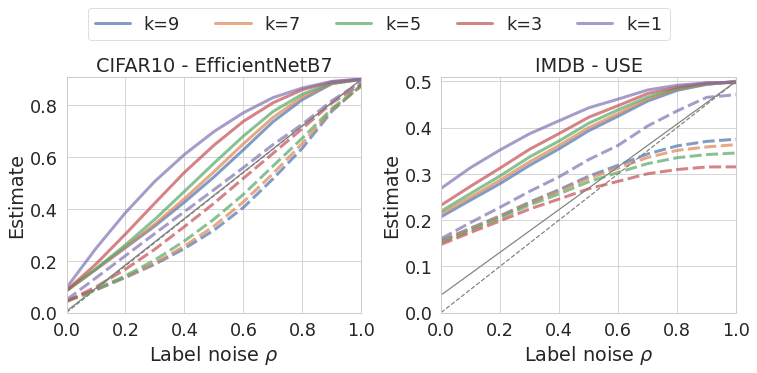

In [28]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))

# CONFIG 2
dataset = 'cifar10'
variants = [f'measure=cosine, k={k}' for k in range(1, 11, 2)]
methods = ['knn']*len(variants)
transformations = ['efficientnet_b7_tf']*len(variants)

axes[0].set_title("CIFAR10 - EfficientNetB7")
axes[0].set_xlim(0, 1.0)
axes[0].set_ylim(0, 0.91)

plot_single_axis(axes[0], dataset, methods, variants, transformations, ci=None,
                 labels_src="variant", label_fn=lambda x: x.split(', ')[-1])

# CONFIG 1
dataset = 'imdb'
variants = [f'measure=cosine, k={k}' for k in range(1, 11, 2)]
methods = ['knn']*len(variants)
transformations = ['use']*len(variants)

axes[1].set_title("IMDB - USE")
axes[1].set_xlim(0, 1.0)
axes[1].set_ylim(0, 0.51)

plot_single_axis(axes[1], dataset, methods, variants, transformations, ci=None,
                 labels_src="variant", label_fn=lambda x: x.split(', ')[-1])

handles, lables = axes.flat[0].get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
f.legend(handles[1:1+len(methods)], lables[1:1+len(methods)], loc='upper center', ncol=len(methods))

for i, ax in enumerate(axes.flat):
  ax.legend([],[], frameon=False)

save_filename = f"{fig_folder}/feebee_larger_k_fails"
plt.subplots_adjust(wspace=0.27, top=0.78)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

### Example fixed transformation and h-params

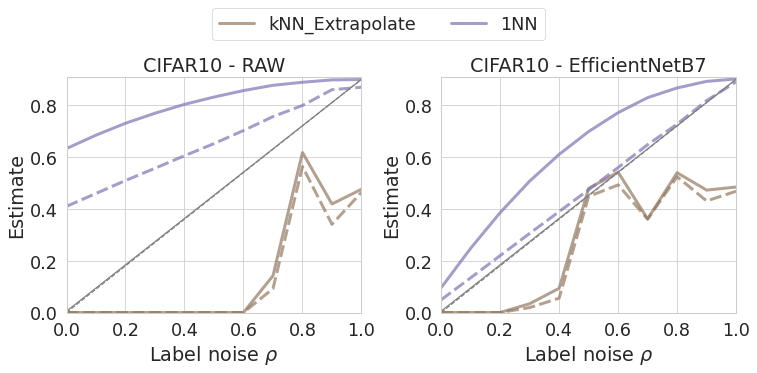

In [29]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))

# CONFIG 2
dataset = 'cifar10'
variants = ['measure=cosine, k=1', 'measure=cosine']
methods = ['knn_extrapolate', '1nn']
transformations = ['raw', 'raw']

axes[0].set_title("CIFAR10 - RAW")
axes[0].set_xlim(0, 1.0)
axes[0].set_ylim(0, 0.91)

plot_single_axis(axes[0], dataset, methods, variants, transformations, ci=None,
                 labels_src="method")

# CONFIG 1
dataset = 'cifar10'
variants = ['measure=cosine, k=1', 'measure=cosine']
methods = ['knn_extrapolate', '1nn']
transformations = ['efficientnet_b7_tf']*len(variants)

axes[1].set_title("CIFAR10 - EfficientNetB7")
axes[1].set_xlim(0, 1.0)
axes[1].set_ylim(0, 0.91)

plot_single_axis(axes[1], dataset, methods, variants, transformations, ci=None,
                 labels_src="method")

handles, lables = axes.flat[0].get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
f.legend(handles[1:1+len(methods)], lables[1:1+len(methods)], loc='upper center', ncol=len(methods))

for i, ax in enumerate(axes.flat):
  ax.legend([],[], frameon=False)

save_filename = f"{fig_folder}/feebee_example_fixed_values_cifar10"
plt.subplots_adjust(wspace=0.27, top=0.78)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

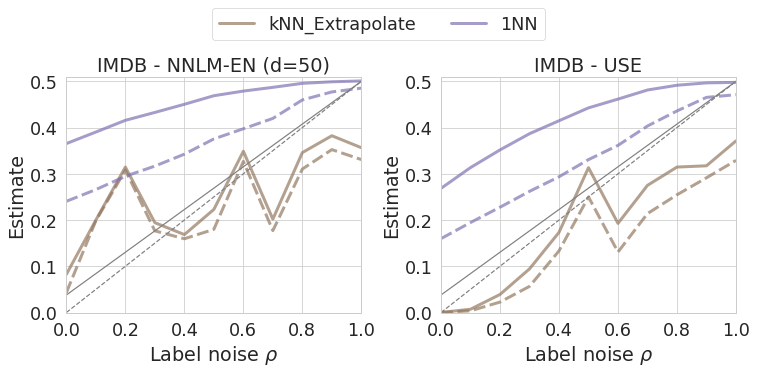

In [30]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))

# CONFIG 2
dataset = 'imdb'
variants = ['measure=cosine, k=1', 'measure=cosine']
methods = ['knn_extrapolate', '1nn']
transformations = ['nnlm50', 'nnlm50']

axes[0].set_title("IMDB - NNLM-EN (d=50)")
axes[0].set_xlim(0, 1.0)
axes[0].set_ylim(0, 0.51)

plot_single_axis(axes[0], dataset, methods, variants, transformations, ci=None,
                 labels_src="method")

# CONFIG 1
dataset = 'imdb'
variants = ['measure=cosine, k=1', 'measure=cosine']
methods = ['knn_extrapolate', '1nn']
transformations = ['use']*len(variants)

axes[1].set_title("IMDB - USE")
axes[1].set_xlim(0, 1.0)
axes[1].set_ylim(0, 0.51)

plot_single_axis(axes[1], dataset, methods, variants, transformations, ci=None,
                 labels_src="method")

handles, lables = axes.flat[0].get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
f.legend(handles[1:1+len(methods)], lables[1:1+len(methods)], loc='upper center', ncol=len(methods))

for i, ax in enumerate(axes.flat):
  ax.legend([],[], frameon=False)

save_filename = f"{fig_folder}/feebee_example_fixed_values_imdb"
plt.subplots_adjust(wspace=0.27, top=0.78)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

### LR Classifier vs. 1NN Bounds

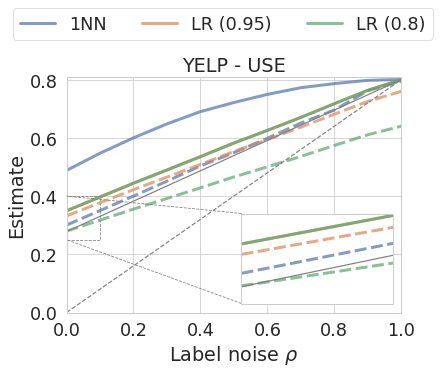

In [31]:
f = plt.figure(figsize=(6, 5))

# CONFIG
dataset = 'yelp'

variants = ['measure=cosine, k=1', "l2=0.0, lr=0.001", "l2=0.0, lr=0.001"]
methods = ['knn', 'lr_model_0.95', 'lr_model_0.8']
transformations = ['use']*len(variants)

ax = plt.axes()

ax.set_title("YELP - USE")
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 0.81)

plot_single_axis(ax, dataset, methods, variants, transformations,
                 labels_src="method", use_palet=False, ci=None,
                 label_fn=lambda x: readble_method("1nn") if x == 'knn' else readble_method(x))

handles, lables = ax.get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
f.legend(handles[1:1+len(methods)], lables[1:1+len(methods)], loc='upper center', ncol=len(methods))

ax.legend([],[], frameon=False)

ax2 = plt.axes([0.53, 0.15, 0.35, 0.25])
ax2.set_xlim(0.0, 0.1)
ax2.set_ylim(0.25, 0.4)
plot_single_axis(ax2, dataset, methods, variants, transformations,
                 labels_src="method", use_palet=False, ci=None,
                 label_fn=lambda x: readble_method("1nn") if x == 'knn' else readble_method(x))
ax2.set_xlabel("")
ax2.set_xticks([])
ax2.set_ylabel("")
ax2.set_yticks([])
ax2.legend([],[], frameon=False)
mark_inset(ax, ax2, loc1=2, loc2=3, fc="none", ec="0.5", ls="--")

save_filename = f"{fig_folder}/feebee_lr_vs_1nn"
plt.subplots_adjust(wspace=0.2, top=0.78)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

### SOTA Variations

In [32]:
# Common function

def filter_by_minquantity_factor(datasets, quantity, factor='1.0'):
  print(f"  Minimizing quantity '{quantity}' on sota with factor '{factor}'")

  if factor == '1.0':
    df_filter = df_areas[(df_areas.method.isin(methods_to_evaluate)) &
                        (df_areas.dataset.isin(datasets))]
  else:
    df_filter = df_areas_factors[factor][(df_areas_factors[factor].method.isin(methods_to_evaluate)) &
                                         (df_areas_factors[factor].dataset.isin(datasets))]

  df_filter = df_filter[~(df_filter.method.isin(["kde_knn_loo", "knn", "onenn"])) |
                        ~(df_filter.variant.str.endswith(", k=1"))]

  df_filter = df_filter.loc[df_filter.groupby(['dataset', 'method'])[quantity].idxmin()]

  val_columns = ['lowerbound', 'upperbound', 'el_sum', 'eu_sum', 
                      'el_bottom','el_top','eu_bottom','eu_top']

  df_csv = df_filter[["dataset", "method",'variant', 'transformation'] +
                     val_columns].copy()
  df_csv.insert(0, 'minimize_quantity', quantity)
  df_csv.insert(0, 'sota_factor', factor)

  for col in val_columns:
    df_csv[col] = df_csv[col].map(lambda x: 0.0 if x < 0 else x)

  df_csv.dataset = df_csv.dataset.map(lambda x: x.upper())
  df_csv.variant = df_csv.variant.map(shorten_variant)
  df_csv.method = df_csv.method.map(readble_method)
  df_csv.transformation = df_csv.transformation.map(readble_transformation)

  return df_csv

In [33]:
df_csv = pd.concat([filter_by_minquantity_factor(config.keys(), "el_sum", '1.0'),
                    filter_by_minquantity_factor(config.keys(), "eu_sum", '1.0')])

for factor in ['0.75', '0.90', '0.95', '1.05', '1.10', '1.25']:
  df_csv = pd.concat([df_csv,
                     filter_by_minquantity_factor(config.keys(), "el_sum", factor),
                     filter_by_minquantity_factor(config.keys(), "eu_sum", factor)])

  Minimizing quantity 'el_sum' on sota with factor '1.0'
  Minimizing quantity 'eu_sum' on sota with factor '1.0'
  Minimizing quantity 'el_sum' on sota with factor '0.75'
  Minimizing quantity 'eu_sum' on sota with factor '0.75'
  Minimizing quantity 'el_sum' on sota with factor '0.90'
  Minimizing quantity 'eu_sum' on sota with factor '0.90'
  Minimizing quantity 'el_sum' on sota with factor '0.95'
  Minimizing quantity 'eu_sum' on sota with factor '0.95'
  Minimizing quantity 'el_sum' on sota with factor '1.05'
  Minimizing quantity 'eu_sum' on sota with factor '1.05'
  Minimizing quantity 'el_sum' on sota with factor '1.10'
  Minimizing quantity 'eu_sum' on sota with factor '1.10'
  Minimizing quantity 'el_sum' on sota with factor '1.25'
  Minimizing quantity 'eu_sum' on sota with factor '1.25'


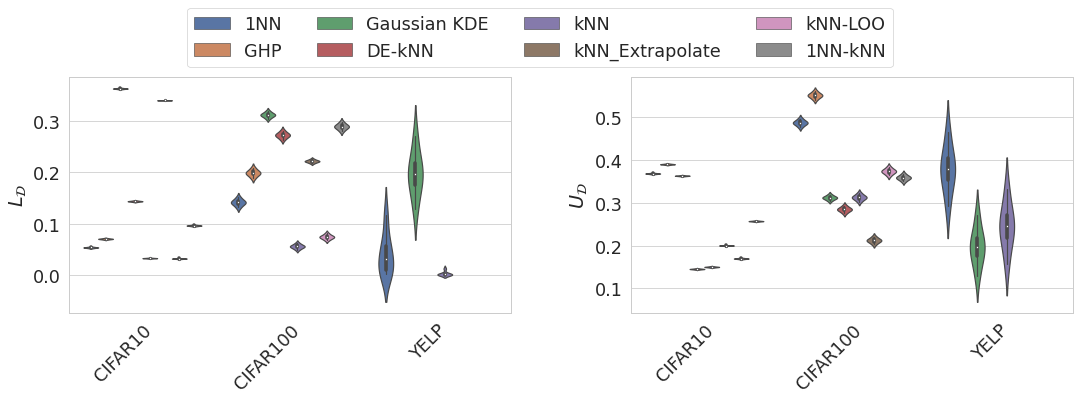

In [34]:
f, axes = plt.subplots(1, 2, figsize=(18, 5))

ax = sns.violinplot(ax=axes[0], x="dataset", y="el_sum", hue="method",
                    data=df_csv[(df_csv.minimize_quantity == 'el_sum') & 
                                df_csv.dataset.isin(['CIFAR10', 'CIFAR100', 'YELP'])],
                    scale='count')
ax.legend().set_visible(False)

ax.set_ylabel('$L_\mathcal{D}$')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

ax = sns.violinplot(ax=axes[1], x="dataset", y="eu_sum", hue="method",
                    data=df_csv[(df_csv.minimize_quantity == 'eu_sum') & 
                                df_csv.dataset.isin(['CIFAR10', 'CIFAR100', 'YELP'])],
                    scale='count')
ax.legend().set_visible(False)

ax.set_ylabel('$U_\mathcal{D}$')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')

handles, lables = axes.flat[0].get_legend_handles_labels()
f.legend(handles, lables, loc='upper center', ncol=4)

for i, ax in enumerate(axes.flat):
  ax.legend([],[], frameon=False)

save_filename = f"{fig_folder}/feebee_variations_of_sota"
plt.subplots_adjust(wspace=0.27, top=0.78)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

### Optimal $L_\mathcal{D}$ and $U_\mathcal{D}$ - Appendix

In [35]:
# Common function

def plot_single(ax, dataset, quantity, value_type):
  print(f"  Minimizing quantity '{quantity}'")

  # CONFIG
  classes = config[dataset]['classes']
  sota = config[dataset]['sota']

  x = [x/float(10) for x in range(11)]
  y_true_upper = [sota + val*((classes - 1.0) / classes - sota) for val in x]
  trivial_lower = 0.0
  y_true_lower = [trivial_lower + val * ((classes - 1.0) / classes - trivial_lower) for val in x]

  df_filter = df_areas[(df_areas.method.isin(methods_to_evaluate)) &
                        (df_areas.dataset == dataset)]

  df_filter = df_filter[~(df_filter.method.isin(["kde_knn_loo", "knn", "onenn"])) |
                        ~(df_filter.variant.str.endswith(", k=1"))]

  df_filter = df_filter.loc[df_filter.groupby('method')[quantity].idxmin()]

  df_filter = df_filter[['dataset','method','variant', 'transformation']]

  df2 = pd.merge(df_results[df_results.value_type == value_type], df_filter, 
                 on=['dataset','method','variant', 'transformation'], how='right')

  # Readable name
  df2["method"] = df2.method.map(readble_method)

  sns.lineplot(x=x, y=y_true_upper, ax=ax)
  sns.lineplot(x=x, y=y_true_lower, ax=ax)
  ax.lines[-2].set_color("Gray")  
  ax.lines[-1].set_color("Gray")
  ax.lines[-1].set_linestyle("--")
  ax = sns.lineplot(data=df2, ax=ax, x='noise', y='value', 
                    hue='method', style='value_type', dashes=dashes, 
                    ci=None, linewidth = 3, palette=palette, alpha=0.7)

  return

Running for dataset 'mnist'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'
Running for dataset 'cifar10'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'
Running for dataset 'cifar100'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'


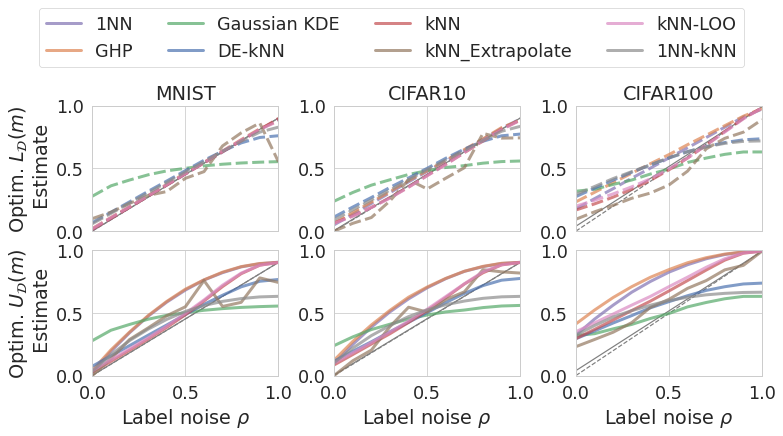

In [36]:
# Vision datasets

datasets = ['mnist', 'cifar10', 'cifar100']
ylims = [1.0, 1.0, 1.0]

f, axes = plt.subplots(2, len(datasets), figsize=(12, 6), sharex='col')
for index, dataset in enumerate(datasets):

  print(f"Running for dataset '{dataset}'")

  x_label = r"Label noise $\rho$"

  ax = axes[0][index]
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, ylims[index])
  plot_single(ax, dataset, "el_sum", "lowerbound")
  ax.set_title("{0}".format(dataset.upper()))
  if index == 0:
    ax.set_ylabel("Optim. $L_{\mathcal{D}}(m)$\n Estimate")
  else:
    ax.set_ylabel("")

  ax = axes[1][index]
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, ylims[index])
  plot_single(ax, dataset, "eu_sum", "upperbound")
  if index == 0:
    ax.set_ylabel("Optim. $U_{\mathcal{D}}(m)$\n Estimate")
  else:
    ax.set_ylabel("")
  ax.set_xlabel(x_label)

handles, lables = axes.flat[0].get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
  h.set_linestyle('solid')

f.legend(handles[1:1+len(methods_to_evaluate)], 
         lables[1:1+len(methods_to_evaluate)], 
         loc='upper center', ncol=(len(methods_to_evaluate))//2)

for i, ax in enumerate(axes.flat):
  ax.legend([],[], frameon=False)

save_filename = f"{fig_folder}/feebee_lower_upper_vision"
plt.subplots_adjust(wspace=0.3, hspace=0.15, top=0.75)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

Running for dataset 'imdb'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'
Running for dataset 'sst2'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'
Running for dataset 'yelp'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'


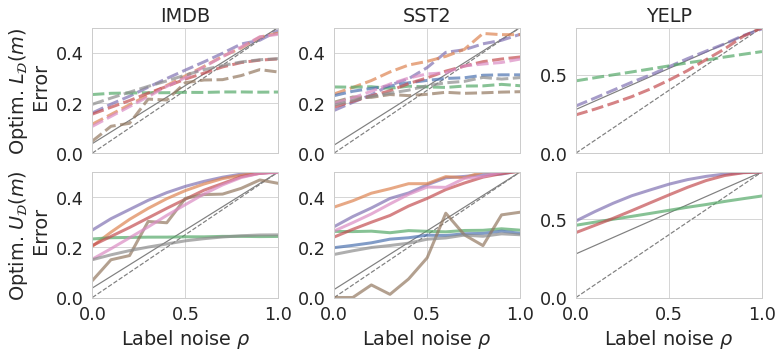

In [37]:
# NLP Datasets

datasets = ['imdb', 'sst2', 'yelp']
ylims = [0.5, 0.5, 0.8]

f, axes = plt.subplots(2, len(datasets), figsize=(12, 6), sharex='col')
for index, dataset in enumerate(datasets):

  print(f"Running for dataset '{dataset}'")

  x_label = r"Label noise $\rho$"

  ax = axes[0][index]
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, ylims[index])
  plot_single(ax, dataset, "el_sum", "lowerbound")
  ax.set_title("{0}".format(dataset.upper()))
  if index == 0:
    ax.set_ylabel("Optim. $L_{\mathcal{D}}(m)$\n Error")
  else:
    ax.set_ylabel("")

  ax = axes[1][index]
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, ylims[index])
  plot_single(ax, dataset, "eu_sum", "upperbound")
  if index == 0:
    ax.set_ylabel("Optim. $U_{\mathcal{D}}(m)$\n Error")
  else:
    ax.set_ylabel("")
  ax.set_xlabel(x_label)

for i, ax in enumerate(axes.flat):
  ax.legend([],[], frameon=False)

save_filename = f"{fig_folder}/feebee_lower_upper_nlp"
plt.subplots_adjust(wspace=0.3, hspace=0.15, top=0.75)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

### Optimal $L_\mathcal{D}$ and $U_\mathcal{D}$ on raw - Appendix

In [38]:
# Common function

def plot_single_raw(ax, dataset, quantity, value_type):
  print(f"  Minimizing quantity '{quantity}'")

  # CONFIG
  classes = config[dataset]['classes']
  sota = config[dataset]['sota']

  x = [x/float(10) for x in range(11)]
  y_true_upper = [sota + val*((classes - 1.0) / classes - sota) for val in x]
  trivial_lower = 0.0
  y_true_lower = [trivial_lower + val * ((classes - 1.0) / classes - trivial_lower) for val in x]

  df_filter = df_areas[(df_areas.method.isin(methods_to_evaluate)) &
                       (df_areas.dataset == dataset) &
                       (df_areas.transformation == 'raw')]

  df_filter = df_filter[~(df_filter.method.isin(["kde_knn_loo", "knn", "onenn"])) |
                        ~(df_filter.variant.str.endswith(", k=1"))]

  df_filter = df_filter.loc[df_filter.groupby('method')[quantity].idxmin()]

  df_filter = df_filter[['dataset','method','variant', 'transformation']]

  df2 = pd.merge(df_results[df_results.value_type == value_type], df_filter, 
                 on=['dataset','method','variant', 'transformation'], how='right')

  # Readable name
  df2["method"] = df2.method.map(readble_method)

  sns.lineplot(x=x, y=y_true_upper, ax=ax)
  sns.lineplot(x=x, y=y_true_lower, ax=ax)
  ax.lines[-2].set_color("Gray")  
  ax.lines[-1].set_color("Gray")
  ax.lines[-1].set_linestyle("--")
  ax = sns.lineplot(data=df2, ax=ax, x='noise', y='value', 
                    hue='method', style='value_type', dashes=dashes, 
                    ci=None, linewidth = 3, palette=palette, alpha=0.7)

  return

Running for dataset 'mnist'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'
Running for dataset 'cifar10'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'
Running for dataset 'cifar100'
  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'


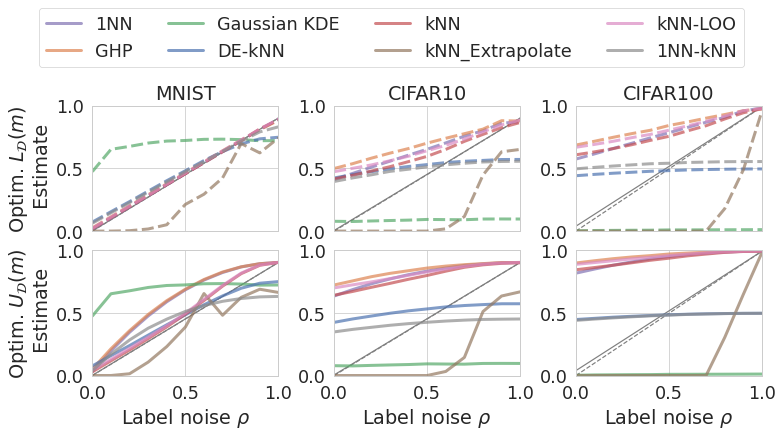

In [39]:
# Vision datasets

datasets = ['mnist', 'cifar10', 'cifar100']
ylims = [1.0, 1.0, 1.0]

f, axes = plt.subplots(2, len(datasets), figsize=(12, 6), sharex='col')
for index, dataset in enumerate(datasets):

  print(f"Running for dataset '{dataset}'")

  x_label = r"Label noise $\rho$"

  ax = axes[0][index]
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, ylims[index])
  plot_single_raw(ax, dataset, "el_sum", "lowerbound")
  ax.set_title("{0}".format(dataset.upper()))
  if index == 0:
    ax.set_ylabel("Optim. $L_{\mathcal{D}}(m)$\n Estimate")
  else:
    ax.set_ylabel("")

  ax = axes[1][index]
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, ylims[index])
  plot_single_raw(ax, dataset, "eu_sum", "upperbound")
  if index == 0:
    ax.set_ylabel("Optim. $U_{\mathcal{D}}(m)$\n Estimate")
  else:
    ax.set_ylabel("")
  ax.set_xlabel(x_label)

handles, lables = axes.flat[0].get_legend_handles_labels()
for h in handles:
  h.set_linewidth(3.0)
  h.set_alpha(0.7)
  h.set_linestyle('solid')

f.legend(handles[1:1+len(methods_to_evaluate)], 
         lables[1:1+len(methods_to_evaluate)], 
         loc='upper center', ncol=(len(methods_to_evaluate))//2)

for i, ax in enumerate(axes.flat):
  ax.legend([],[], frameon=False)

save_filename = f"{fig_folder}/feebee_lower_upper_raw_vision"
plt.subplots_adjust(wspace=0.3, hspace=0.15, top=0.75)
f.savefig("{}.pdf".format(save_filename), bbox_inches = 'tight', pad_inches = 0)

## Tables

In [40]:
tbl_folder = "tables"
if not path.exists(tbl_folder):
  os.mkdir(tbl_folder)

In [41]:
# Common function

def filter_by_minquantity(datasets, quantity, only_raw=False):
  print(f"  Minimizing quantity '{quantity}'")

  if only_raw:
    df_filter = df_areas[(df_areas.method.isin(methods_to_evaluate)) &
                         (df_areas.dataset.isin(datasets)) &
                         (df_areas.transformation == 'raw')]
  else:
    df_filter = df_areas[(df_areas.method.isin(methods_to_evaluate)) &
                          (df_areas.dataset.isin(datasets))]

  df_filter = df_filter[~(df_filter.method.isin(["kde_knn_loo", "knn", "onenn"])) |
                        ~(df_filter.variant.str.endswith(", k=1"))]

  df_filter = df_filter.loc[df_filter.groupby(['dataset', 'method'])[quantity].idxmin()]

  val_columns = ['lowerbound', 'upperbound', 'el_sum', 'eu_sum', 
                      'el_bottom','el_top','eu_bottom','eu_top']

  df_csv = df_filter[["dataset", "method",'variant', 'transformation'] +
                     val_columns].copy()
  df_csv.insert(0, 'minimize_quantity', quantity)

  for col in val_columns:
    df_csv[col] = df_csv[col].map(lambda x: 0.0 if x < 0 else x)

  df_csv.variant = df_csv.variant.map(shorten_variant)
  df_csv.method = df_csv.method.map(readble_method)
  df_csv.transformation = df_csv.transformation.map(readble_transformation)

  return df_csv

### Optimal $L_\mathcal{D}$ and $U_\mathcal{D}$

In [42]:
df_csv = pd.concat([filter_by_minquantity(config.keys(), "el_sum"),
                    filter_by_minquantity(config.keys(), "eu_sum")])

  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'


In [43]:
pd.options.display.float_format = '{:,.2f}'.format
minimizers=['el_sum','eu_sum']
methods_extended=['DE-kNN','Gaussian KDE','GHP','1NN-kNN','1NN','kNN','kNN-LOO','kNN_Extrapolate']

final_df=pd.DataFrame(columns=methods_extended)

for minimizer in minimizers:
  columns = ['minimize_quantity', 'method', minimizer]
  new_df=pd.DataFrame(columns=methods_extended)
  for dataset, df_grp in df_csv.groupby("dataset"):
    df_grp=df_grp[df_grp['minimize_quantity']==minimizer][['method',minimizer]]
    df_grp=df_grp.transpose()
    df_grp.reset_index(inplace=True)
    df_grp.at[0,'index']='Dataset'
    df_grp.at[1,'index']=dataset.upper()
    df_grp.columns=df_grp.iloc[0]
    df_grp=df_grp[1:]
    new_df=pd.concat([new_df,df_grp])

  new_df=new_df[['Dataset']+methods_extended]
  new_df.set_index('Dataset', inplace=True)
  new_df=new_df.reindex(['MNIST','CIFAR10','CIFAR100','IMDB','SST2','YELP'])
  final_df=pd.concat([final_df,new_df])
final_df.reset_index(drop=False, inplace=True)
final_df.rename(columns={'index': 'Dataset', 'Gaussian KDE': 'KDE', 'kNN_Extrapolate':'kNN_Ext'}, inplace=True)
display(final_df)

with open(f'{tbl_folder}/l_d_and_u_d.txt', 'w') as f:
  f.write('\\begin{table}[t!]\n')
  f.write('\\centering\n')
  f.write('\\caption{$L_{\cD}(m)$ and $U_{\cD}(m)$: The optimal values per method.}\n')
  f.write('\\label{tbl:el_eu}\n')
  f.write('\\small\n')
  f.write( final_df.to_latex(index=False,na_rep='-') )
  f.write('\\end{table}')

,Dataset,DE-kNN,KDE,GHP,1NN-kNN,1NN,kNN,kNN-LOO,kNN_Ext
0,MNIST,0.11,0.41,0.03,0.07,0.02,0.02,0.03,0.28
1,CIFAR10,0.14,0.36,0.07,0.1,0.05,0.03,0.03,0.34
2,CIFAR100,0.27,0.31,0.2,0.29,0.14,0.06,0.07,0.22
3,IMDB,NaN,0.49,0.16,0.31,0.25,0.25,0.15,0.25
4,SST2,0.42,0.49,0.44,0.38,0.32,0.29,0.34,0.47
5,YELP,NaN,0.2,NaN,NaN,0.03,0.0,NaN,NaN
6,MNIST,0.11,0.41,0.33,0.22,0.32,0.09,0.11,0.37
7,CIFAR10,0.15,0.36,0.39,0.26,0.37,0.15,0.17,0.2
8,CIFAR100,0.28,0.31,0.55,0.36,0.49,0.31,0.37,0.21
9,IMDB,NaN,0.49,0.51,0.39,0.6,0.43,0.34,0.28


### $L_\mathcal{D}$ vs. $\ell_\mathcal{D}$

In [44]:
df_csv = pd.concat([filter_by_minquantity(config.keys(), "lowerbound"),
                    filter_by_minquantity(config.keys(), "el_sum")])

  Minimizing quantity 'lowerbound'
  Minimizing quantity 'el_sum'


In [45]:
pd.options.display.float_format = '{:,.2f}'.format
columns = ['minimize_quantity', 'method', 'variant', 'transformation', 'lowerbound', 'el_sum']
columns_for_latex = ['method','delta']
methods_extended = ['DE-kNN','Gaussian KDE','GHP','1NN-kNN','1NN','kNN','kNN-LOO','kNN_Extrapolate']
new_df = pd.DataFrame(columns=methods_extended)
for dataset, df_grp in df_csv.groupby("dataset"):
  df_grp["delta"] = pd.Series(dtype=float)
  for method, df_method in df_grp.groupby("method"):
    idx = df_method.index.to_list()
    df_grp.at[idx[0],"delta"] = df_method.at[idx[0],"el_sum"]-df_method.at[idx[1],"el_sum"]
  df_to_latex=df_grp[df_grp['minimize_quantity']=='lowerbound'][columns_for_latex]
  df_to_latex=df_to_latex.transpose()
  df_to_latex.reset_index(inplace=True)
  df_to_latex.at[0,'index']='dataset'
  df_to_latex.at[1,'index']=dataset.upper()

  df_to_latex.columns=df_to_latex.iloc[0]
  df_to_latex=df_to_latex[1:]
  new_df=pd.concat([new_df,df_to_latex])

new_df=new_df[['dataset']+methods_extended]
new_df.set_index('dataset', inplace=True)
new_df=new_df.reindex(['MNIST','CIFAR10','CIFAR100','IMDB','SST2','YELP'])
new_df.reset_index(drop=False, inplace=True)
new_df.rename(columns={'dataset': 'Dataset', 'Gaussian KDE': 'KDE', 'kNN_Extrapolate':'kNN_Ext'}, inplace=True)
display(new_df)

with open(f'{tbl_folder}/lower_vs_l_d.txt', 'w') as f:
  f.write('\\begin{table}[t!]\n')
  f.write('\\centering\n')
  f.write('\\caption{The difference between the \\emph{optimal} $L_{\\cD}(m)$ and the $L_{\\cD}(m)$ calculated for hyper-parameters and transformations that minimize $l_{\\cD,m}(0)$.}\n')
  f.write('\\label{tbl:min_l_vs_min_el}\n')
  f.write('\\small\n')
  f.write( new_df.to_latex(index=False,na_rep='-'))
  f.write('\\end{table}')

,Dataset,DE-kNN,KDE,GHP,1NN-kNN,1NN,kNN,kNN-LOO,kNN_Ext
0,MNIST,0.24,0.59,0.0,0.56,0.0,0.06,0.04,0.37
1,CIFAR10,0.21,0.64,0.0,0.52,0.0,0.11,0.1,0.42
2,CIFAR100,0.1,0.69,0.0,0.3,0.0,0.05,0.02,0.59
3,IMDB,NaN,0.01,0.0,0.26,0.01,0.14,0.2,0.33
4,SST2,0.0,0.5,0.01,0.2,0.0,0.11,0.09,0.3
5,YELP,NaN,0.09,NaN,NaN,0.0,0.0,NaN,NaN


### knn with k>=1 and LR Classifier vs. 1NN Bounds

In [46]:
def filter_fn(row):
    for i, m in enumerate(methods):
      if ((row.method == m) and
          (row.transformation == transformations[i]) and 
          (row.variant == variants[i])):
          return True
    return False

# CONFIG 1
dataset = 'yelp'
variants = ['measure=cosine, k=1', "l2=0.0, lr=0.001", "l2=0.0, lr=0.001"]
methods = ['knn', 'lr_model_0.95', 'lr_model_0.8']
transformations = ['use']*len(variants)

df_filter1 = df_areas[(df_areas.method.isin(methods)) &
                     (df_areas.dataset == dataset) &
                     (df_areas.variant.isin(variants)) &
                     (df_areas.transformation.isin(transformations))]
df_filter1 = df_filter1[df_filter1.apply(filter_fn, axis=1)].copy()

# CONFIG 2
dataset = 'imdb'
variants = [f'measure=cosine, k={k}' for k in range(1, 11, 2)]
methods = ['knn']*len(variants)
transformations = ['use']*len(variants)

df_filter2 = df_areas[(df_areas.method.isin(methods)) &
                     (df_areas.dataset == dataset) &
                     (df_areas.variant.isin(variants)) &
                     (df_areas.transformation.isin(transformations))]
df_filter2 = df_filter2[df_filter2.apply(filter_fn, axis=1)].copy()

# CONFIG 3
dataset = 'cifar10'
variants = [f'measure=cosine, k={k}' for k in range(1, 11, 2)]
methods = ['knn']*len(variants)
transformations = ['efficientnet_b7_tf']*len(variants)

df_filter3 = df_areas[(df_areas.method.isin(methods)) &
                     (df_areas.dataset == dataset) &
                     (df_areas.variant.isin(variants)) &
                     (df_areas.transformation.isin(transformations))]
df_filter3 = df_filter3[df_filter3.apply(filter_fn, axis=1)].copy()

filtered_df = pd.concat([df_filter1, df_filter2, df_filter3])

def newmethod(row):
  if row.method == 'knn':
    k = row.variant.split('k=')[-1]
    return f'{k}NN'
  return readble_method(row.method)

filtered_df.method = filtered_df.apply(newmethod, axis=1)
filtered_df.dataset = filtered_df.dataset.apply(lambda x: x.upper())
filtered_df.transformation = filtered_df.transformation.apply(readble_transformation)

# filtered_df.set_index('method', inplace=True)
filtered_df = filtered_df[['dataset', 'method', 'transformation', 'eu_top', 'el_sum', 'el_top', 'el_bottom']]

filtered_df.rename(columns={
    'dataset': 'Dataset',
    'method': 'Method',
    'transformation': 'Transformation',
    'el_sum': '$L_{\cD}(m)$', 
    'el_bottom': '$L_{\cD,\triangleleft}(m)$',
    'el_top': '$L_{\cD,\triangleright}(m)$',
    'eu_sum': '$U_{\cD}(m)$', 
    'eu_bottom': '$U_{\cD,\triangleleft}(m)$',
    'eu_top': '$U_{\cD,\triangleright}(m)$'}, inplace=True)

filtered_df.reset_index(drop=True, inplace=True)
filtered_df.sort_values(by=["Dataset", "Method"], inplace=True)
display(filtered_df)

with open(f'{tbl_folder}/lr_vs_1nn_and_knn_gteq_1.txt', 'w') as f:
  f.write('\\begin{table}[h!]\n')
  f.write('\\centering\n')
  f.write('\\caption{Impact of $k > 1$ and LR Model with different constants vs. 1NN.}\n')
  f.write('\\label{tbl:lr_vs_1nn_and_k_gteq_1}\n')
  f.write('\\small\n')
  f.write( filtered_df.to_latex(index=False, na_rep='-', escape=False) )
  f.write('\\end{table}')

,Dataset,Method,Transformation,"$U_{\cD,\triangleright}(m)$",$L_{\cD}(m)$,"$L_{\cD,\triangleright}(m)$","$L_{\cD,\triangleleft}(m)$"
8,CIFAR10,1NN,EfficientNet-B7,0.37,0.05,0.05,0.00
9,CIFAR10,3NN,EfficientNet-B7,0.28,0.04,0.01,0.03
10,CIFAR10,5NN,EfficientNet-B7,0.21,0.11,0.01,0.11
11,CIFAR10,7NN,EfficientNet-B7,0.18,0.14,0.01,0.14
12,CIFAR10,9NN,EfficientNet-B7,0.16,0.16,0.01,0.15
3,IMDB,1NN,USE,0.60,0.26,0.25,0.01
4,IMDB,3NN,USE,0.52,0.30,0.12,0.17
5,IMDB,5NN,USE,0.48,0.27,0.14,0.13
6,IMDB,7NN,USE,0.45,0.26,0.15,0.11
7,IMDB,9NN,USE,0.43,0.25,0.16,0.09


### Optimal $L_\mathcal{D}$ and $U_\mathcal{D}$ on raw - Appendix

In [47]:
df_csv = pd.concat([filter_by_minquantity(config.keys(), "el_sum", only_raw=True),
                    filter_by_minquantity(config.keys(), "eu_sum", only_raw=True)])

  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'


In [48]:
pd.options.display.float_format = '{:,.2f}'.format
minimizers=['el_sum','eu_sum']
methods_extended=['DE-kNN','Gaussian KDE','GHP','1NN-kNN','1NN','kNN','kNN-LOO','kNN_Extrapolate']

final_df=pd.DataFrame(columns=methods_extended)

for minimizer in minimizers:
  columns = ['minimize_quantity', 'method', minimizer]
  new_df=pd.DataFrame(columns=methods_extended)
  for dataset, df_grp in df_csv.groupby("dataset"):
    df_grp=df_grp[df_grp['minimize_quantity']==minimizer][['method',minimizer]]
    df_grp=df_grp.transpose()
    df_grp.reset_index(inplace=True)
    df_grp.at[0,'index']='Dataset'
    df_grp.at[1,'index']=dataset.upper()
    df_grp.columns=df_grp.iloc[0]
    df_grp=df_grp[1:]
    new_df=pd.concat([new_df,df_grp])

  new_df=new_df[['Dataset']+methods_extended]
  new_df.set_index('Dataset', inplace=True)
  new_df=new_df.reindex(['MNIST','CIFAR10','CIFAR100'])
  final_df=pd.concat([final_df,new_df])
final_df.reset_index(drop=False, inplace=True)
final_df.rename(columns={'index': 'Dataset', 'Gaussian KDE': 'KDE', 'kNN_Extrapolate':'kNN_Ext'}, inplace=True)
display(final_df)

with open(f'{tbl_folder}/l_d_and_u_d_raw_vision.txt', 'w') as f:
  f.write('\\begin{table}[t!]\n')
  f.write('\\centering\n')
  f.write('\\caption{$L_{\cD}(m)$ and $U_{\cD}(m)$: The optimal values per method.}\n')
  f.write('\\label{tbl:el_eu}\n')
  f.write('\\small\n')
  f.write( final_df.to_latex(index=True,na_rep='-') )
  f.write('\\end{table}')

,Dataset,DE-kNN,KDE,GHP,1NN-kNN,1NN,kNN,kNN-LOO,kNN_Ext
0,MNIST,0.12,0.64,0.03,0.07,0.02,0.02,0.03,0.5
1,CIFAR10,0.47,0.83,0.55,0.45,0.46,0.39,0.46,0.69
2,CIFAR100,0.49,0.98,0.66,0.49,0.54,0.53,0.61,0.71
3,MNIST,0.12,0.64,0.34,0.22,0.32,0.09,0.11,0.43
4,CIFAR10,0.47,0.83,0.85,0.48,0.79,0.75,0.8,0.66
5,CIFAR100,0.49,0.98,0.89,0.49,0.84,0.84,0.88,0.65


### Optimal $L_{\mathcal{D}}$ and $U_{\mathcal{D}}$ per dataset - Appendix

In [49]:
df_csv = pd.concat([filter_by_minquantity(config.keys(), "el_sum"),
                    filter_by_minquantity(config.keys(), "eu_sum")])

  Minimizing quantity 'el_sum'
  Minimizing quantity 'eu_sum'


In [50]:
datasets = config.keys()

pd.options.display.float_format = '{:,.2f}'.format
minimizers=['el','eu']
with open(f'{tbl_folder}/optimal_l_d_u_d_tables.txt', 'w') as f:
  f.write('')

# Manually escape stuff
df_csv.variant = df_csv.variant.apply(lambda x: x.replace('squared_l2', 'squared\_l2'))
df_csv.method = df_csv.method.apply(lambda x: x.replace('kNN_Extrapolate', 'kNN\_Extrapolate'))

final_columns_L=['Method','Variant', 'Transformation','$L_{\cD}(m)$','$L_{\cD,\triangleleft}(m)$','$L_{\cD,\triangleright}(m)$']
final_columns_U=['Method','Variant', 'Transformation','$U_{\cD}(m)$','$U_{\cD,\triangleleft}(m)$','$U_{\cD,\triangleright}(m)$']
for minimizer in minimizers:
  columns = ['minimize_quantity', 'method','variant', 'transformation',minimizer+'_sum',minimizer+'_bottom',minimizer+'_top']
  for dataset in datasets:
    df_grp = df_csv[df_csv.dataset == dataset].sort_values(minimizer+'_sum')
    print("======================")
    print(f"Minimize {minimizer} for Dataset: {dataset}")
    df_grp=df_grp[df_grp['minimize_quantity']==minimizer+'_sum'][columns]
    df_grp.rename(columns={
          'method': 'Method',
          'variant': 'Variant',
          'transformation': 'Transformation',
          }, inplace=True)
    if minimizer=='el':
      df_grp.rename(columns={minimizer+'_sum': '$L_{\cD}(m)$', minimizer+'_bottom': '$L_{\cD,\triangleleft}(m)$',minimizer+'_top': '$L_{\cD,\triangleright}(m)$'}, inplace=True)
    else:
      df_grp.rename(columns={minimizer+'_sum': '$U_{\cD}(m)$', minimizer+'_bottom': '$U_{\cD,\triangleleft}(m)$',minimizer+'_top': '$U_{\cD,\triangleright}(m)$'}, inplace=True)
    display(df_grp)
    with open(f'{tbl_folder}/optimal_l_d_u_d_tables.txt', 'a') as f:
      f.write('\\begin{table}[t!]\n')
      f.write('\\centering\n')
      if minimizer=='el':
        f.write('\\caption{'+dataset.upper()+' - Optimal $L_{\\cD}(m)$}.\n')
      else:
        f.write('\\caption{'+dataset.upper()+' - Optimal $U_{\\cD}(m)$}.\n')
      f.write('\\label{tbl:'+dataset+'_optimal_'+minimizer+'}\n')
      f.write('\\small\n')
      if minimizer=='el':
        f.write( df_grp[final_columns_L].to_latex(index=False, na_rep='-', escape=False) )
      else:
        f.write( df_grp[final_columns_U].to_latex(index=False, na_rep='-', escape=False) )
      f.write('\\end{table}\n\n')

Minimize el for Dataset: mnist


,minimize_quantity,Method,Variant,Transformation,$L_{\cD}(m)$,"$L_{\cD,\triangleleft}(m)$","$L_{\cD,\triangleright}(m)$"
21368,el_sum,kNN,"dist=cosine, k=2",NCA (d=64),0.02,0.00,0.01
19040,el_sum,1NN,dist=cosine,NCA (d=64),0.02,0.01,0.01
22229,el_sum,kNN-LOO,"dist=cosine, k=2",NCA (d=64),0.03,0.01,0.02
19084,el_sum,GHP,default,PCA (d=32),0.03,0.00,0.02
23281,el_sum,1NN-kNN,"dist=cosine, k=21",PCA (d=32),0.07,0.02,0.05
19354,el_sum,DE-kNN,"dist=squared\_l2, k=15",PCA (d=32),0.11,0.05,0.06
21790,el_sum,kNN\_Extrapolate,"dist=cosine, k=10",PCA (d=32),0.28,0.15,0.13
19132,el_sum,Gaussian KDE,B=0.05,VGG16,0.41,0.18,0.23


Minimize el for Dataset: cifar10


,minimize_quantity,Method,Variant,Transformation,$L_{\cD}(m)$,"$L_{\cD,\triangleleft}(m)$","$L_{\cD,\triangleright}(m)$"
3812,el_sum,kNN-LOO,"dist=squared\_l2, k=3",EfficientNet-B3,0.03,0.01,0.02
2971,el_sum,kNN,"dist=squared\_l2, k=3",EfficientNet-B2,0.03,0.01,0.02
417,el_sum,1NN,dist=squared\_l2,EfficientNet-B7,0.05,0.00,0.05
435,el_sum,GHP,default,EfficientNet-B4,0.07,0.00,0.07
6756,el_sum,1NN-kNN,"dist=squared\_l2, k=22",EfficientNet-B7,0.10,0.02,0.08
771,el_sum,DE-kNN,"dist=squared\_l2, k=18",EfficientNet-B7,0.14,0.04,0.11
3401,el_sum,kNN\_Extrapolate,"dist=squared\_l2, k=3",PCA (d=32),0.34,0.23,0.11
510,el_sum,Gaussian KDE,B=0.1,ResNet152-V2,0.36,0.19,0.18


Minimize el for Dataset: cifar100


,minimize_quantity,Method,Variant,Transformation,$L_{\cD}(m)$,"$L_{\cD,\triangleleft}(m)$","$L_{\cD,\triangleright}(m)$"
10930,el_sum,kNN,"dist=cosine, k=5",EfficientNet-B5,0.06,0.01,0.05
11813,el_sum,kNN-LOO,"dist=cosine, k=6",EfficientNet-B6,0.07,0.01,0.07
8541,el_sum,1NN,dist=cosine,EfficientNet-B7,0.14,0.00,0.14
8583,el_sum,GHP,default,EfficientNet-B7,0.20,0.00,0.20
11483,el_sum,kNN\_Extrapolate,"dist=squared\_l2, k=1",PCA (d=32),0.22,0.17,0.05
9420,el_sum,DE-kNN,"dist=squared\_l2, k=4",EfficientNet-B7,0.27,0.10,0.18
14670,el_sum,1NN-kNN,"dist=squared\_l2, k=12",EfficientNet-B7,0.29,0.10,0.19
8658,el_sum,Gaussian KDE,B=0.1,VGG19,0.31,0.18,0.14


Minimize el for Dataset: imdb


,minimize_quantity,Method,Variant,Transformation,$L_{\cD}(m)$,"$L_{\cD,\triangleleft}(m)$","$L_{\cD,\triangleright}(m)$"
17404,el_sum,kNN-LOO,"dist=squared\_l2, k=1",USE,0.15,0.01,0.14
16713,el_sum,GHP,default,USE,0.16,0.01,0.16
16900,el_sum,kNN,"dist=cosine, k=9",USE,0.25,0.09,0.16
16701,el_sum,1NN,dist=squared\_l2,USE,0.25,0.01,0.24
17232,el_sum,kNN\_Extrapolate,"dist=squared\_l2, k=6",PCA (d=16),0.25,0.19,0.06
17936,el_sum,1NN-kNN,"dist=cosine, k=4",PCA (d=32),0.31,0.09,0.22
16724,el_sum,Gaussian KDE,B=0.0025,PCA (d=8),0.49,0.29,0.20


Minimize el for Dataset: sst2


,minimize_quantity,Method,Variant,Transformation,$L_{\cD}(m)$,"$L_{\cD,\triangleleft}(m)$","$L_{\cD,\triangleright}(m)$"
28714,el_sum,kNN,"dist=cosine, k=10",BOW-TFIDF,0.29,0.08,0.20
27177,el_sum,1NN,dist=cosine,ELMO,0.32,0.02,0.30
29383,el_sum,kNN-LOO,"dist=cosine, k=7",USE,0.34,0.10,0.24
30093,el_sum,1NN-kNN,"dist=cosine, k=3",ELMO,0.38,0.20,0.18
27765,el_sum,DE-kNN,"dist=squared\_l2, k=4",NNLM-EN-NORM (d=128),0.42,0.17,0.25
27215,el_sum,GHP,default,USE,0.44,0.01,0.42
29172,el_sum,kNN\_Extrapolate,"dist=squared\_l2, k=2",PCA (d=8),0.47,0.29,0.18
27225,el_sum,Gaussian KDE,B=0.0025,PCA (d=16),0.49,0.24,0.25


Minimize el for Dataset: yelp


,minimize_quantity,Method,Variant,Transformation,$L_{\cD}(m)$,"$L_{\cD,\triangleleft}(m)$","$L_{\cD,\triangleright}(m)$"
32757,el_sum,kNN,"dist=squared\_l2, k=9",USE,0.00,0.00,0.00
32581,el_sum,1NN,dist=squared\_l2,USE,0.03,0.00,0.03
32590,el_sum,Gaussian KDE,B=0.05,NNLM-EN (d=50),0.20,0.06,0.14


Minimize eu for Dataset: mnist


,minimize_quantity,Method,Variant,Transformation,$U_{\cD}(m)$,"$U_{\cD,\triangleleft}(m)$","$U_{\cD,\triangleright}(m)$"
21347,eu_sum,kNN,"dist=cosine, k=10",NCA (d=64),0.09,0.00,0.09
22208,eu_sum,kNN-LOO,"dist=cosine, k=10",NCA (d=64),0.11,0.00,0.11
19375,eu_sum,DE-kNN,"dist=squared\_l2, k=16",PCA (d=32),0.11,0.04,0.07
23468,eu_sum,1NN-kNN,"dist=cosine, k=3",NCA (d=64),0.22,0.12,0.09
19040,eu_sum,1NN,dist=cosine,NCA (d=64),0.32,0.00,0.32
19084,eu_sum,GHP,default,PCA (d=32),0.33,0.00,0.33
21789,eu_sum,kNN\_Extrapolate,"dist=cosine, k=10",PCA (d=128),0.37,0.16,0.21
19132,eu_sum,Gaussian KDE,B=0.05,VGG16,0.41,0.18,0.23


Minimize eu for Dataset: cifar10


,minimize_quantity,Method,Variant,Transformation,$U_{\cD}(m)$,"$U_{\cD,\triangleleft}(m)$","$U_{\cD,\triangleright}(m)$"
771,eu_sum,DE-kNN,"dist=squared\_l2, k=18",EfficientNet-B7,0.15,0.04,0.11
2703,eu_sum,kNN,"dist=cosine, k=10",EfficientNet-B7,0.15,0.00,0.15
3561,eu_sum,kNN-LOO,"dist=cosine, k=10",EfficientNet-B4,0.17,0.00,0.17
3401,eu_sum,kNN\_Extrapolate,"dist=squared\_l2, k=3",PCA (d=32),0.20,0.04,0.16
6924,eu_sum,1NN-kNN,"dist=squared\_l2, k=3",EfficientNet-B7,0.26,0.12,0.14
510,eu_sum,Gaussian KDE,B=0.1,ResNet152-V2,0.36,0.19,0.18
396,eu_sum,1NN,dist=cosine,EfficientNet-B7,0.37,0.00,0.37
435,eu_sum,GHP,default,EfficientNet-B4,0.39,0.00,0.39


Minimize eu for Dataset: cifar100


,minimize_quantity,Method,Variant,Transformation,$U_{\cD}(m)$,"$U_{\cD,\triangleleft}(m)$","$U_{\cD,\triangleright}(m)$"
11420,eu_sum,kNN\_Extrapolate,"dist=cosine, k=7",PCA (d=32),0.21,0.02,0.19
9419,eu_sum,DE-kNN,"dist=squared\_l2, k=4",EfficientNet-B6,0.28,0.09,0.19
8658,eu_sum,Gaussian KDE,B=0.1,VGG19,0.31,0.18,0.14
10848,eu_sum,kNN,"dist=cosine, k=10",EfficientNet-B7,0.31,0.00,0.31
15069,eu_sum,1NN-kNN,"dist=squared\_l2, k=3",EfficientNet-B7,0.36,0.14,0.22
11708,eu_sum,kNN-LOO,"dist=cosine, k=10",EfficientNet-B6,0.37,0.00,0.37
8541,eu_sum,1NN,dist=cosine,EfficientNet-B7,0.49,0.00,0.49
8583,eu_sum,GHP,default,EfficientNet-B7,0.55,0.00,0.55


Minimize eu for Dataset: imdb


,minimize_quantity,Method,Variant,Transformation,$U_{\cD}(m)$,"$U_{\cD,\triangleleft}(m)$","$U_{\cD,\triangleright}(m)$"
17232,eu_sum,kNN\_Extrapolate,"dist=squared\_l2, k=6",PCA (d=16),0.28,0.03,0.25
17512,eu_sum,kNN-LOO,"dist=squared\_l2, k=9",USE,0.34,0.00,0.34
17804,eu_sum,1NN-kNN,"dist=cosine, k=2",PCA (d=32),0.39,0.29,0.10
17032,eu_sum,kNN,"dist=squared\_l2, k=9",USE,0.43,0.00,0.43
16724,eu_sum,Gaussian KDE,B=0.0025,PCA (d=8),0.49,0.29,0.20
16713,eu_sum,GHP,default,USE,0.51,0.00,0.51
16701,eu_sum,1NN,dist=squared\_l2,USE,0.60,0.00,0.60


Minimize eu for Dataset: sst2


,minimize_quantity,Method,Variant,Transformation,$U_{\cD}(m)$,"$U_{\cD,\triangleleft}(m)$","$U_{\cD,\triangleright}(m)$"
29940,eu_sum,1NN-kNN,"dist=cosine, k=2",NNLM-EN (d=128),0.42,0.29,0.13
27465,eu_sum,DE-kNN,"dist=squared\_l2, k=2",USE,0.43,0.27,0.17
28714,eu_sum,kNN,"dist=cosine, k=10",BOW-TFIDF,0.48,0.00,0.48
27225,eu_sum,Gaussian KDE,B=0.0025,PCA (d=16),0.49,0.24,0.25
29299,eu_sum,kNN-LOO,"dist=cosine, k=10",USE,0.57,0.00,0.57
29173,eu_sum,kNN\_Extrapolate,"dist=squared\_l2, k=2",USE,0.61,0.49,0.12
27177,eu_sum,1NN,dist=cosine,ELMO,0.63,0.00,0.63
27205,eu_sum,GHP,default,ELMO,0.73,0.00,0.73


Minimize eu for Dataset: yelp


,minimize_quantity,Method,Variant,Transformation,$U_{\cD}(m)$,"$U_{\cD,\triangleleft}(m)$","$U_{\cD,\triangleright}(m)$"
32590,eu_sum,Gaussian KDE,B=0.05,NNLM-EN (d=50),0.20,0.06,0.14
32624,eu_sum,kNN,"dist=cosine, k=10",USE,0.25,0.00,0.24
32581,eu_sum,1NN,dist=squared\_l2,USE,0.38,0.00,0.38
